In [1]:
import tensorflow as tf

# Basics, Tensors

Note: Tensors can live on your graphics card or on your computer's main memory.

In [2]:
tf.add(1,2)

<tf.Tensor: shape=(), dtype=int32, numpy=3>

In [5]:
tf.add(1,2.) # careful

TypeError: Cannot convert 2.0 to EagerTensor of dtype int32

In [6]:
tf.add([1,2], [3,4])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6], dtype=int32)>

In [7]:
tf.square(123)

<tf.Tensor: shape=(), dtype=int32, numpy=15129>

In [8]:
tf.reduce_sum(range(100))

<tf.Tensor: shape=(), dtype=int32, numpy=4950>

In [10]:
tf.square(10) + tf.square(100)

<tf.Tensor: shape=(), dtype=int32, numpy=10100>

In [11]:
tf.constant(1)

<tf.Tensor: shape=(), dtype=int32, numpy=1>

In [12]:
tf.constant([1,3,4])

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([1, 3, 4], dtype=int32)>

In [13]:
tf.constant([[1,3,4],[5,6,7]])

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 3, 4],
       [5, 6, 7]], dtype=int32)>

In [15]:
tf.linalg.inv([[1.,2.], [3.,4.]])

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[-2.0000002 ,  1.0000001 ],
       [ 1.5000001 , -0.50000006]], dtype=float32)>

# Optimiziation

In [27]:
opt = tf.optimizers.SGD(learning_rate=0.3)

In [28]:
var = tf.Variable(2.0)

In [20]:
with tf.GradientTape() as tape:
    y = var**2 + 1

In [21]:
tape.gradient(y, var)

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

In [22]:
loss = lambda : var**2 / 1.5

In [23]:
loss()

<tf.Tensor: shape=(), dtype=float32, numpy=2.6666667>

In [24]:
opt.minimize(loss, [var])

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [26]:
loss()

<tf.Tensor: shape=(), dtype=float32, numpy=0.29629627>

In [25]:
var

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.6666666>

In [29]:
var_vals, loss_vals = [], []
for _ in range(30):
    opt.minimize(loss, [var])
    var_vals.append(var.numpy())
    loss_vals.append(loss())

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

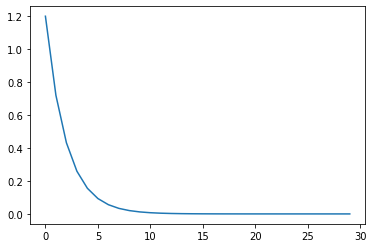

In [31]:
plt.plot(var_vals)

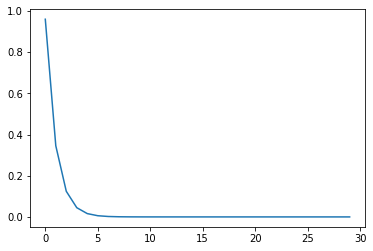

In [32]:
plt.plot(loss_vals)

# Datasets

In [33]:
ds = tf.data.Dataset.from_tensor_slices(list(range(12)))

In [34]:
for i in ds.map(tf.square).shuffle(2).batch(3):
    print(i)

tf.Tensor([0 4 9], shape=(3,), dtype=int32)
tf.Tensor([16  1 36], shape=(3,), dtype=int32)
tf.Tensor([49 25 81], shape=(3,), dtype=int32)
tf.Tensor([ 64 100 121], shape=(3,), dtype=int32)


In [35]:
ds.reduce(0, lambda state, value: state + value)

<tf.Tensor: shape=(), dtype=int32, numpy=66>

In [37]:
state = 0
op = lambda state, value: state+value
for value in ds:
    state = op(state, value)

In [38]:
state

<tf.Tensor: shape=(), dtype=int32, numpy=66>

In [39]:
ds.map(tf.square).reduce(0, tf.add)

<tf.Tensor: shape=(), dtype=int32, numpy=506>